**Predict Survival by using Titanic Data: Review purpose**

# EDA (Exporatory Data Analysis)

*#* Let's explore the data to see which columns we will use to predict survival.

## Load Titanic Train dataset

In [1]:
tTrain <- read.csv("./Data/titanic/train.csv")
head(tTrain)
tail(tTrain)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


## Data Exporation

In [2]:
str(tTrain)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [3]:
dim(tTrain)

[1] 891  12

data.frame:	891 obs. of  12 variables:
 - PassengerId: int 
 - Survived   : int   
 - Pclass     : int    
 - Name       : Factor w/ 891 levels   
 - Sex        : Factor w/ 2 levels "female","male"  
 - Age        : num    
 - SibSp      : int    
 - Parch      : int    
 - Ticket     : Factor w/ 681 levels   
 - Fare       : num    
 - Cabin      : Factor w/ 148 levels   
 - Embarked   : Factor w/ 4 levels   

### orderBy "targets"

In [4]:
library(doBy)

In [5]:
tTrain.order <- orderBy(~Survived, tTrain)
head(tTrain.order)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### reset rownames

In [6]:
rownames(tTrain.order) <- c()
head(tTrain.order)
tail(tTrain.order)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


### Explore the target column

#### Proportion of target data

In [7]:
victimCount   <- sum(tTrain.order$Survived == 0)
survivorCount <- sum(tTrain.order$Survived == 1)
totalCount    =  victimCount + survivorCount

## Alternatively ##
# victimCount   <- nrow(subset(tTrain.order, Survived == 0))
# survivorCount <- nrow(subset(tTrain.order, Survived == 1))
# totalCount    =  victimCount + survivorCount

victimCount ; survivorCount ; totalCount

[1] 549

[1] 342

[1] 891

In [8]:
labelVec <- c("Victims", "Survivors")
SurvivedVec <- c(victimCount, survivorCount)
SurvivedVec  # This is a vector SurvivedVec [1] ; SurvivedVec [2]

[1] 549 342

In [9]:
ratio <- round((SurvivedVec/totalCount) * 100, 2)
ratio

[1] 61.62 38.38

##### pie3D

In [10]:
library(plotrix)

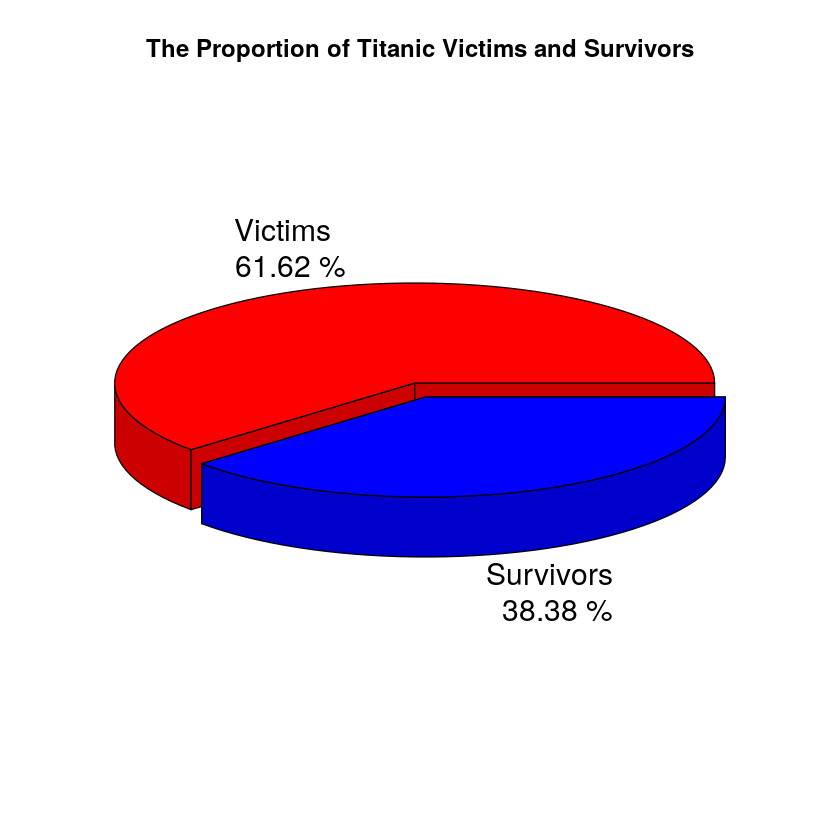

In [11]:
label = paste(labelVec, "\n", ratio, "%")

pie3D(SurvivedVec,
      main = "The Proportion of Titanic Victims and Survivors",
      labels = label,
      col = c("red","blue"),
      explode = 0.05)

## Alternatively, ## 
# pie3D(SurvivedVec,
#       main = "The Proportion of Titanic Victims and Survivors",
#       labels = paste(labelVec, "\n", ratio, "%"),
#       col = c("red","blue"),
#       explode = 0.05)

##### barplot

In [12]:
tableBar <- table(tTrain.order$Survived)  # the best way to draw barchart is to use table
tableBar


  0   1 
549 342 

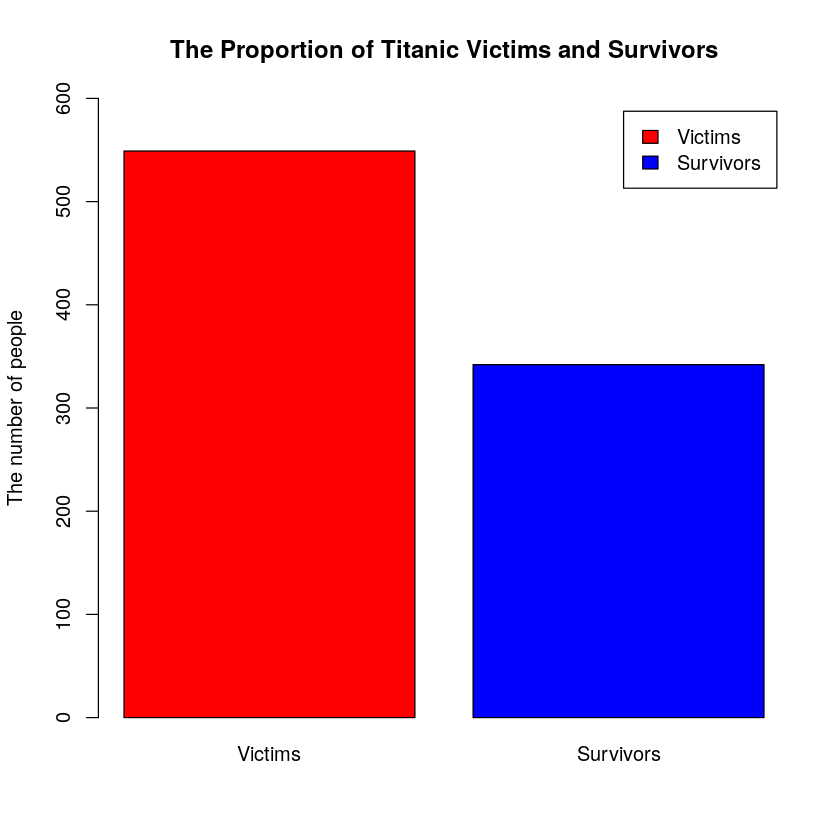

In [13]:
labelVS = c("Victims", "Survivors")

barplot(tableBar,
        main = "The Proportion of Titanic Victims and Survivors",
#       xlab = "Victims and Survivors",
        ylab = "The number of people",
        ylim = c(0,600),
        names.arg = labelVS,
        legend.text = labelVS,
        col = c("red","blue"))

*#* Survived column will be our target that we are going to predict whether people are survived or not with trained machine learning models.

*#* The proportion of victims and survivors are 61.62% and 38.38%. This is okay to proceed analysis because it is not extremely skewed like 95%: 5%. However, we should see if it is worth analyzing data with same proportions.

#### Define trainData by examing each column

In [14]:
str(tTrain.order)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


##### Survived by Pclass?

In [15]:
str(tTrain.order$Pclass)

 int [1:891] 3 3 3 1 3 3 3 3 3 3 ...


In [16]:
table(is.na(tTrain.order$Pclass)) # to check whether this column contains NA


FALSE 
  891 

In [17]:
# Count each pClass

table(tTrain.order$Pclass) # Simple
pClass1Count <- table(tTrain.order$Pclass)[1]
pClass2Count <- table(tTrain.order$Pclass)[2]
pClass3Count <- table(tTrain.order$Pclass)[3]

## Alternatively, ##
# pClass1Count   <- sum(tTrain.order$Pclass == 1) # == "1" also works
# pClass2Count   <- sum(tTrain.order$Pclass == 2)
# pClass3Count   <- sum(tTrain.order$Pclass == 3)

## or ##
# pClass1Count   <- nrow(subset(tTrain.order, Pclass == 1))
# pClass2Count   <- nrow(subset(tTrain.order, Pclass == 2))
# pClass3Count   <- nrow(subset(tTrain.order, Pclass == 3))

pClass1Count ; pClass2Count ; pClass3Count


  1   2   3 
216 184 491 

1 
216

2 
184

3 
491

In [18]:
pClass1.Victim   = nrow(subset(tTrain.order, Pclass == 1 & Survived == 0))
pClass1.Survivor = nrow(subset(tTrain.order, Pclass == 1 & Survived == 1))

pClass2.Victim   = nrow(subset(tTrain.order, Pclass == 2 & Survived == 0))
pClass2.Survivor = nrow(subset(tTrain.order, Pclass == 2 & Survived == 1))

pClass3.Victim   = nrow(subset(tTrain.order, Pclass == 3 & Survived == 0))
pClass3.Survivor = nrow(subset(tTrain.order, Pclass == 3 & Survived == 1))

In [19]:
paste(pClass1.Victim, pClass1.Survivor)
paste(pClass2.Victim, pClass2.Survivor)
paste(pClass2.Victim, pClass3.Survivor)

[1] "80 136"

[1] "97 87"

[1] "97 119"

*#* pClass1.Victim < pClass1.Survivor  
*#* pClass2.Victim > pClass2.Survivor  
*#* pClass3.Victim > pClass3.Survivor  
*#* The porportion of survived passengers in Class 1 execeed that of victims, while the class 2 and 3 shows the opposite results. It can be used for trainData.

##### Survived by Pclass and Sex?

###### Exercise 1: for loop and double for loop

In [20]:
for(j in c("female", "male")){
    for(i in 1:3){
        genderCountlist = nrow(subset(tTrain.order, (Sex == j) & (Pclass == i)))
    genderLiveCountlist = nrow(subset(tTrain.order, (Sex == j) & (Pclass == i)
                                 & (Survived == 1)))
    cat(paste(j, "survivors in class", i,":   ", genderLiveCountlist, "/", genderCountlist, ",",
              round(genderLiveCountlist/genderCountlist * 100, 2), "%", "\n"))
        }
    cat(paste("------------------------------------------------------------------\n"))
}

female survivors in class 1 :    91 / 94 , 96.81 % 
female survivors in class 2 :    70 / 76 , 92.11 % 
female survivors in class 3 :    72 / 144 , 50 % 
------------------------------------------------------------------
male survivors in class 1 :    45 / 122 , 36.89 % 
male survivors in class 2 :    17 / 108 , 15.74 % 
male survivors in class 3 :    47 / 347 , 13.54 % 
------------------------------------------------------------------


In [21]:
## Alternatively,

# female
for (i in seq(1:3)){
    femaleCountlist = nrow(subset(tTrain.order, (Sex == "female") & (Pclass == i)))
    femaleLiveCountlist = nrow(subset(tTrain.order, (Sex == "female") & (Pclass == i)
                                 & (Survived == 1)))
    cat(paste(i, "The percentage of female survivors in class 1: ", femaleLiveCountlist, "/", femaleCountlist, ",",
          round(femaleLiveCountlist/femaleCountlist * 100, 2), "%", "\n"))
}

cat(paste("-------------------------------------------------------------------"),"\n")

# male
for (i in 1:3){
    maleCountlist = nrow(subset(tTrain.order, (Sex == "male") & (Pclass == i)))
    maleLiveCountlist = nrow(subset(tTrain.order, (Sex == "male") & (Pclass == i)
                                 & (Survived == 1)))
    cat(paste(i, "The percentage of male survivors in class 1: ", maleLiveCountlist, "/", maleCountlist, ",",
          round(maleLiveCountlist/maleCountlist * 100, 2), "%", "\n"))
}

cat(paste("-------------------------------------------------------------------"),"\n")

1 The percentage of female survivors in class 1:  91 / 94 , 96.81 % 
2 The percentage of female survivors in class 1:  70 / 76 , 92.11 % 
3 The percentage of female survivors in class 1:  72 / 144 , 50 % 
------------------------------------------------------------------- 
1 The percentage of male survivors in class 1:  45 / 122 , 36.89 % 
2 The percentage of male survivors in class 1:  17 / 108 , 15.74 % 
3 The percentage of male survivors in class 1:  47 / 347 , 13.54 % 
------------------------------------------------------------------- 


In [22]:
# the number of female in class 1
femaleCountlist = nrow(subset(tTrain.order, (Sex == "female") & (Pclass == 1)))
  # femaleCountlist

# the number of female survivors in class 1
femaleLiveCountlist = nrow(subset(tTrain.order, (Sex == "female") & (Pclass == 1)
                                 & (Survived == 1)))
  # femaleLiveCountlist

cat(paste("The percentage of female survivors in class 1: ", femaleLiveCountlist, "/", femaleCountlist, ",",
          round(femaleLiveCountlist/femaleCountlist * 100, 2), "%", "\n"))

The percentage of female survivors in class 1:  91 / 94 , 96.81 % 


In [23]:
# Convert female into FEMALE ; male into MALE

## ifelse (in R way)
for(j in c("female", "male")){
    for(i in seq(1:3)){
        genderCountlist = nrow(subset(tTrain.order, (Sex == j) & (Pclass == i)))
    genderLiveCountlist = nrow(subset(tTrain.order, (Sex == j) & (Pclass == i)
                                 & (Survived == 1)))
    cat(paste(ifelse(j=="female", "FEMALE", "MALE"), "survivors in class", i,":   ", genderLiveCountlist, "/", genderCountlist, ",",
              round(genderLiveCountlist/genderCountlist * 100, 2), "%", "\n"))
        }
    cat(paste("------------------------------------------------------------------\n"))
}

FEMALE survivors in class 1 :    91 / 94 , 96.81 % 
FEMALE survivors in class 2 :    70 / 76 , 92.11 % 
FEMALE survivors in class 3 :    72 / 144 , 50 % 
------------------------------------------------------------------
MALE survivors in class 1 :    45 / 122 , 36.89 % 
MALE survivors in class 2 :    17 / 108 , 15.74 % 
MALE survivors in class 3 :    47 / 347 , 13.54 % 
------------------------------------------------------------------


In [24]:
## Anternatively, (by typical programming way)

sex = c("female", "male")
gender = c("FEMALE", "MALE")
tkClass = c(1,2,3)
k = 1

for(j in sex){
    for(i in tkClass){
        genderCountlist = nrow(subset(tTrain.order, (Sex == j) & (Pclass == i)))
    genderLiveCountlist = nrow(subset(tTrain.order, (Sex == j) & (Pclass == i)
                                 & (Survived == 1)))
    cat(paste(gender[k], "survivors in class", i,":   ", genderLiveCountlist, "/", genderCountlist, ",",
              round(genderLiveCountlist/genderCountlist * 100, 2), "%", "\n"))
        }
    cat(paste("------------------------------------------------------------------\n"))
    k = k + 1
}

FEMALE survivors in class 1 :    91 / 94 , 96.81 % 
FEMALE survivors in class 2 :    70 / 76 , 92.11 % 
FEMALE survivors in class 3 :    72 / 144 , 50 % 
------------------------------------------------------------------
MALE survivors in class 1 :    45 / 122 , 36.89 % 
MALE survivors in class 2 :    17 / 108 , 15.74 % 
MALE survivors in class 3 :    47 / 347 , 13.54 % 
------------------------------------------------------------------


In [25]:
## Anternatively, 
charac <- data.frame(c("female", "male"), c("FEMALE", "MALE"))
charac

c..female....male..,c..FEMALE....MALE..
<fct>,<fct>
female,FEMALE
male,MALE


In [26]:
## input the values into vectors

# create blank vectors
femaleData <- c()
maleData <- c()

for(j in c("female", "male")){
    for(i in 1:3){
        genderCountlist = nrow(subset(tTrain.order, (Sex == j) & (Pclass == i)))
    genderLiveCountlist = nrow(subset(tTrain.order, (Sex == j) & (Pclass == i)
                                 & (Survived == 1)))
    cat(paste(j, "survivors in class", i,":   ", genderLiveCountlist, "/", genderCountlist, ",",
              round(genderLiveCountlist/genderCountlist * 100, 2), "%", "\n"))
        
        
    if (j == "female"){
        femaleData[i] = round(genderLiveCountlist/genderCountlist * 100, 2)
    }else{
        maleData[i] = round(genderLiveCountlist/genderCountlist * 100, 2)
    }
    }
    cat(paste("------------------------------------------------------------------\n"))
}


female survivors in class 1 :    91 / 94 , 96.81 % 
female survivors in class 2 :    70 / 76 , 92.11 % 
female survivors in class 3 :    72 / 144 , 50 % 
------------------------------------------------------------------
male survivors in class 1 :    45 / 122 , 36.89 % 
male survivors in class 2 :    17 / 108 , 15.74 % 
male survivors in class 3 :    47 / 347 , 13.54 % 
------------------------------------------------------------------


In [27]:
femaleData ; maleData

[1] 96.81 92.11 50.00

[1] 36.89 15.74 13.54

In [28]:
dfData <- data.frame(female = femaleData, male = maleData)
dfData

female,male
<dbl>,<dbl>
96.81,36.89
92.11,15.74
50.00,13.54


In [29]:
# combine Vectors

vecData <- append(femaleData, maleData)
# vecData <- c(femaleData, maleData)

vecData

[1] 96.81 92.11 50.00 36.89 15.74 13.54

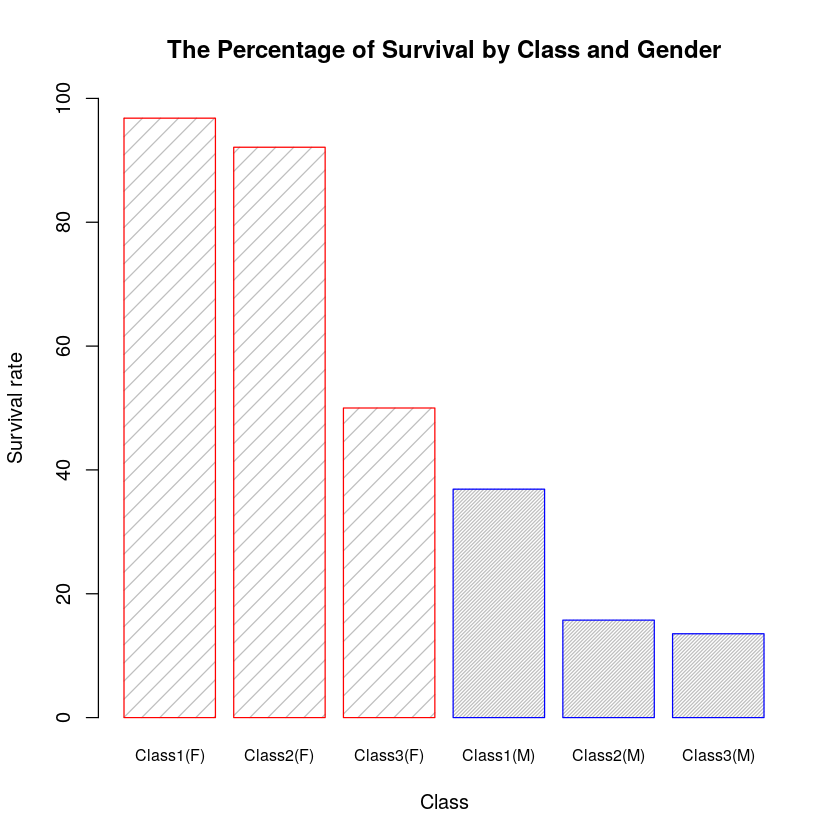

In [30]:
# Bar plot
barplot(vecData, 
        main = "The Percentage of Survival by Class and Gender", 
        xlab = "Class", ylab = "Survival rate",
        names.arg = c("Class1(F)", "Class2(F)", "Class3(F)", 
                     "Class1(M)", "Class2(M)", "Class3(M)"), 
        border = c(rep("red", 3), rep("blue", 3)),
        density = c(rep(10, 3), rep(50, 3)),
        cex.names = 0.8,
        ylim = c(0, 100)
       )

The higher ticket class, the higher survival rate

=> Use in trainData

##### Survived by Name?

In [31]:
str(tTrain.order$Name)

 Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...


*#* We can hardly find any connection bewteen different names (characters) on Name column and our target(Survived column). So, we will not use name as a column in trainData.

=> No use in trainData

##### Survived by Sex?

In [32]:
str(tTrain.order$Sex)

 Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...


In [33]:
table(is.na(tTrain.order$Sex)) # to check whether this column contains NA


FALSE 
  891 

In [34]:
# Count female and male
table(tTrain.order$Sex)

femaleCount <- sum(tTrain.order$Sex == "female")
maleCount   <- sum(tTrain.order$Sex == "male")

## Alternatively,##
# femaleCount <- nrow(subset(tTrain.order, Sex == "female"))
# maleCount   <- nrow(subset(tTrain.order, Sex == "male"))

## or ##

# femaleCount <- table(tTrain.order$Sex)[1]
# maleCount   <- table(tTrain.order$Sex)[2]

paste(femaleCount, maleCount)


female   male 
   314    577 

[1] "314 577"

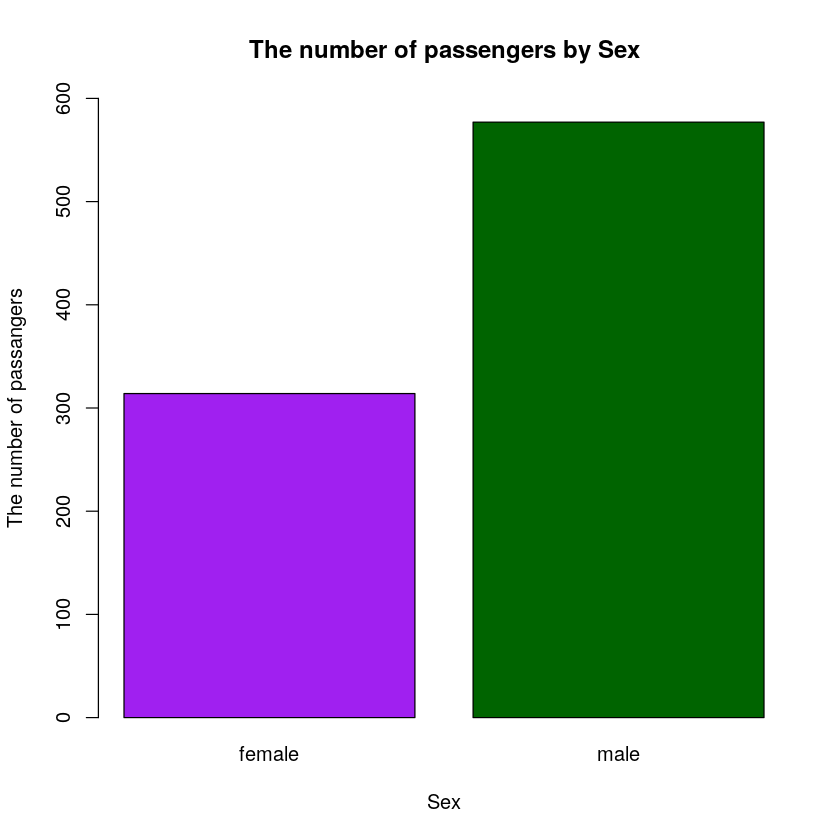

In [35]:
# Bar plot
table_barBySex <- table(tTrain.order$Sex)
barplot(table_barBySex,
        col = c("purple", "dark green"),
        main = "The number of passengers by Sex",
       xlab = "Sex",
       ylab = "The number of passangers",
       ylim = c(0, 600),
       names.arg = c("female", "male"))

In [36]:
female.Victim   = nrow(subset(tTrain.order, Sex == "female" & Survived == 0))
female.Survivor = nrow(subset(tTrain.order, Sex == "female" & Survived == 1))

male.Victim   = nrow(subset(tTrain.order, Sex == "male" & Survived == 0))
male.Survivor = nrow(subset(tTrain.order, Sex == "male" & Survived == 1))

In [37]:
paste(female.Victim, female.Survivor)
paste(male.Victim, male.Survivor)

[1] "81 233"

[1] "468 109"

In [38]:
print("female")
cat(paste("death rate of female:",    round(female.Victim  /femaleCount * 100, 2), "%", "\n"))
cat(paste("survival rate of female:", round(female.Survivor/femaleCount * 100, 2), "%", "\n", "\n"))

print("male")
cat(paste("death rate of male:",    round(male.Victim  /maleCount * 100, 2), "%", "\n"))
cat(paste("survival rate of male:", round(male.Survivor/maleCount * 100, 2), "%", "\n"))

[1] "female"
death rate of female: 25.8 % 
survival rate of female: 74.2 % 
 
[1] "male"
death rate of male: 81.11 % 
survival rate of male: 18.89 % 


In [39]:
femaleVec <- c(female.Victim, female.Survivor)
maleVec   <- c(male.Victim, male.Survivor)

fRatio <- round(femaleVec  /femaleCount * 100, 2)
mRatio <- round(maleVec  /maleCount * 100, 2)

fRatio ; mRatio

[1] 25.8 74.2

[1] 81.11 18.89

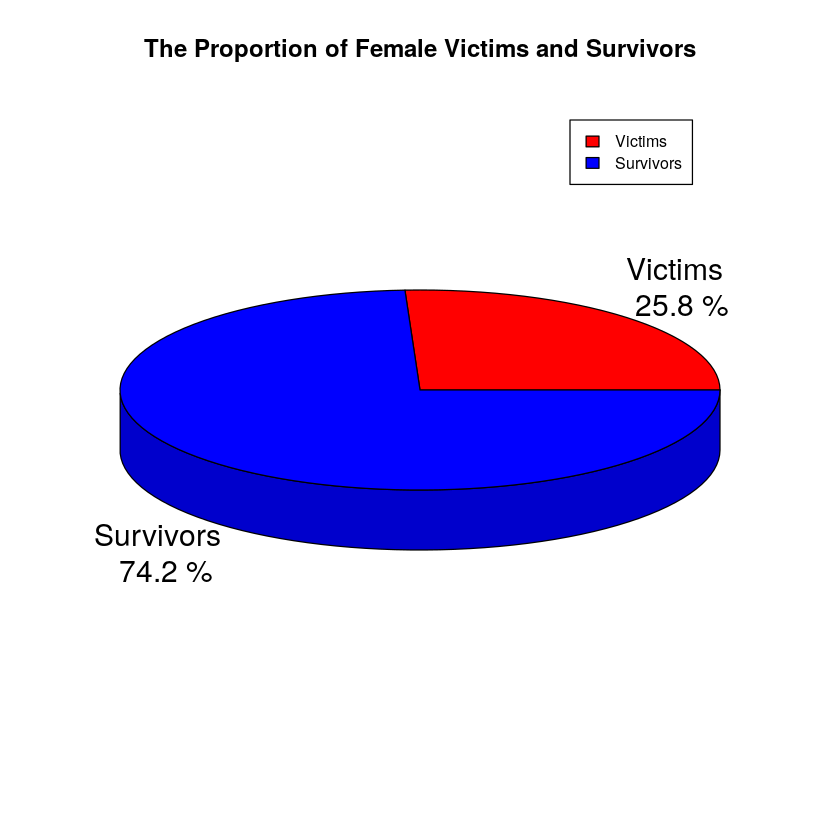

In [40]:
labelFemale = paste(labelVec, "\n", fRatio, "%")

pie3D(fRatio,
      main = "The Proportion of Female Victims and Survivors",
      labels = labelFemale,
#      explode = 0.05,
      col = c("red", "blue"),
     )

legend(0.5, 1,
       labelVS,
       cex = 0.8,
       fill = c("red", "blue")
      )

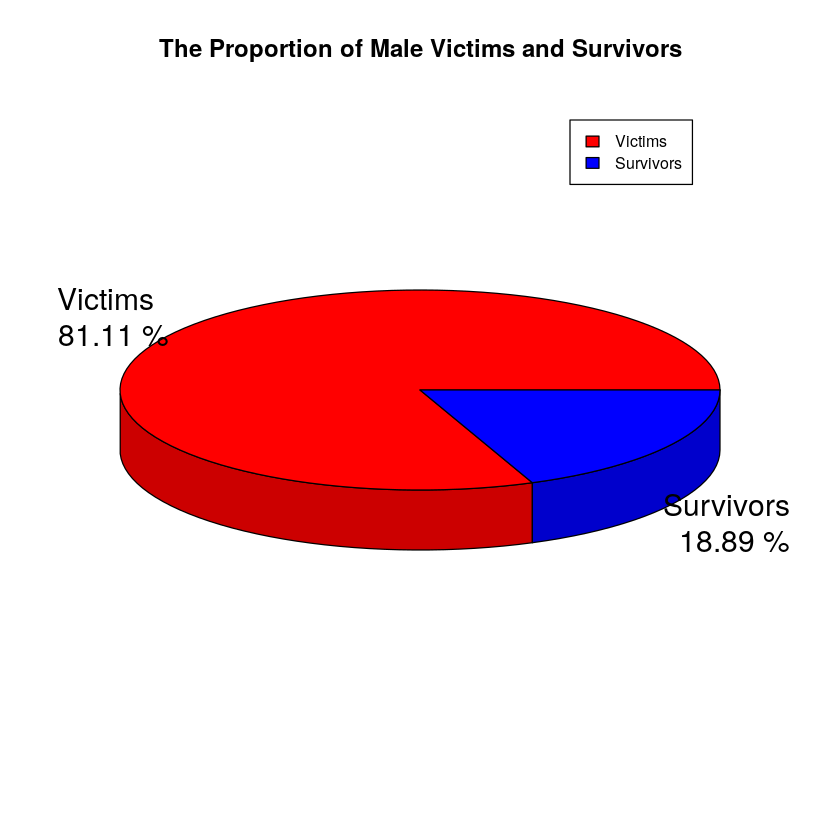

In [41]:
labelMale = paste(labelVec, "\n", mRatio, "%")

pie3D(mRatio,
      main = "The Proportion of Male Victims and Survivors",
      labels = labelMale,
#      explode = 0.05,
      col = c("red", "blue")
     )

legend(0.5, 1,
       labelVS,
       cex = 0.8,
       fill = c("red", "blue")
      )

*#* The survival rate of female (74.20%) is much higher than that of male (18.89%).  
=> Use in trainData

##### Survived by Age?

In [42]:
str(tTrain.order$Age)

 num [1:891] 22 35 NA 54 2 20 39 14 2 31 ...


In [43]:
table(is.na(tTrain.order$Age))


FALSE  TRUE 
  714   177 

In [44]:
round(table(is.na(tTrain.order$Age))[2]/
      (table(is.na(tTrain.order$Age))[1] + table(is.na(tTrain.order$Age))[2]) * 100, 2)

TRUE 
19.87

*#* approx. 20% of Age data is missing. So, it is not proper to use in trainData.

=> No use in trainData












###### Where are the age data missing the most?

Let's also have a look at Pclass, Sex, and Embarked with regards to missing values.  
(It does not make sense to see tables in uncategorized columns like SibSp, Parch, Ticket, Fare, and Cabin, because it does not show us any pattern.)

by Pclass

In [45]:
table(tTrainORD$Pclass, is.na(tTrain.order$Age)) # to check whether this column contains NA

ERROR: Error in table(tTrainORD$Pclass, is.na(tTrain.order$Age)): object 'tTrainORD' not found


In [46]:
round(table(tTrain.order$Pclass, is.na(tTrain.order$Age))[1,2]/
      (table(tTrain.order$Pclass, is.na(tTrain.order$Age))[1,1]+table(tTrain.order$Pclass, is.na(tTrain.order$Age))[1,2])*100,2)
round(table(tTrain.order$Pclass, is.na(tTrain.order$Age))[2,2]/
      (table(tTrain.order$Pclass, is.na(tTrain.order$Age))[2,1]+table(tTrain.order$Pclass, is.na(tTrain.order$Age))[2,2])*100,2)
round(table(tTrain.order$Pclass, is.na(tTrain.order$Age))[3,2]/
      (table(tTrain.order$Pclass, is.na(tTrain.order$Age))[3,1]+table(tTrain.order$Pclass, is.na(tTrain.order$Age))[3,2])*100,2)

[1] 13.89

[1] 5.98

[1] 27.7

by Sex

In [47]:
table(tTrain.order$Sex, is.na(tTrain.order$Age)) # to check whether this column contains NA

        
         FALSE TRUE
  female   261   53
  male     453  124

In [48]:
round(table(tTrain.order$Sex, is.na(tTrain.order$Age))[1,2]/
      (table(tTrain.order$Sex, is.na(tTrain.order$Age))[1,1]+table(tTrain.order$Sex, is.na(tTrain.order$Age))[1,2])*100,2)
round(table(tTrain.order$Sex, is.na(tTrain.order$Age))[2,2]/
      (table(tTrain.order$Sex, is.na(tTrain.order$Age))[2,1]+table(tTrain.order$Sex, is.na(tTrain.order$Age))[2,2])*100,2)

[1] 16.88

[1] 21.49

by Embarked

In [49]:
table(tTrain.order$Embarked, is.na(tTrain.order$Age))

   
    FALSE TRUE
        2    0
  C   130   38
  Q    28   49
  S   554   90

In [50]:
round(table(tTrain.order$Embarked, is.na(tTrain.order$Age))[2,2]/
      (table(tTrain.order$Embarked, is.na(tTrain.order$Age))[2,1]+table(tTrain.order$Embarked, is.na(tTrain.order$Age))[2,2])*100,2)
round(table(tTrain.order$Embarked, is.na(tTrain.order$Age))[3,2]/
      (table(tTrain.order$Embarked, is.na(tTrain.order$Age))[3,1]+table(tTrain.order$Embarked, is.na(tTrain.order$Age))[3,2])*100,2)
round(table(tTrain.order$Embarked, is.na(tTrain.order$Age))[4,2]/
      (table(tTrain.order$Embarked, is.na(tTrain.order$Age))[4,1]+table(tTrain.order$Embarked, is.na(tTrain.order$Age))[4,2])*100,2)

[1] 22.62

[1] 63.64

[1] 13.98

*#* About 64% (without two missing values in Embarked) Age data in Embarked Q is missing.

In [51]:
str(tTrain.order)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


##### Survived by SipSp

In [52]:
str(tTrain.order$SibSp)

 int [1:891] 1 0 0 0 3 0 1 0 4 1 ...


=> No use in trainData

###### Survived by Parch

In [53]:
str(tTrain.order$Parch)

 int [1:891] 0 0 0 0 1 0 5 0 1 0 ...


=> No use in trainData

###### Survived by Ticket

In [54]:
str(tTrain.order$Ticket)

 Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...


=> No use in trainData

###### Survived by Fare

In [55]:
str(tTrain.order$Fare)
summary(tTrain.order$Fare)

 num [1:891] 7.25 8.05 8.46 51.86 21.07 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.91   14.45   32.20   31.00  512.33 

In [56]:
# table((cut(tTrain.order$Fare, breaks = seq(0, 520), right = F)), tTrain.order$Pclass)

In [57]:
cor.test(tTrain.order$Fare, tTrain.order$Pclass)


	Pearson's product-moment correlation

data:  tTrain.order$Fare and tTrain.order$Pclass
t = -19.61, df = 889, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5937488 -0.5019370
sample estimates:
       cor 
-0.5494996 


*#* moderate negative relationship with Pclass as cor is -0.55.

In [58]:
cor.test(tTrain.order$Fare, tTrain.order$Survived) # 


	Pearson's product-moment correlation

data:  tTrain.order$Fare and tTrain.order$Survived
t = 7.9392, df = 889, p-value = 6.12e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1949232 0.3176165
sample estimates:
      cor 
0.2573065 


*#* However, fare is not correlated to Survived. Fare probably subject to the number of luggages, embarked place, age, etc.

=> Let's run models with/without fare to see which one is better!

###### Survived by Cabin

In [59]:
str(tTrain.order$Cabin)

 Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...


In [60]:
# table(tTrainORD$Cabin)
table(tTrain.order$Cabin)[1]

687

In [61]:
table(tTrain.order$Cabin)[1]/totalCount

0.7710438

*#* There are too many missing data in Cabin column (77.1%).

=> No use in trainData

###### Survived by Embarked?

In [62]:
str(tTrain.order$Embarked) 
unique(tTrain.order$Embarked) 

 Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


[1] S Q C  
Levels:  C Q S

In [63]:
table(tTrain.order$Embarked)


      C   Q   S 
  2 168  77 644 

In [64]:
table(tTrain.order$Survived, tTrain.order$Embarked)

   
          C   Q   S
  0   0  75  47 427
  1   2  93  30 217

In [65]:
table(tTrain.order$Sex, tTrain.order$Embarked)

        
               C   Q   S
  female   2  73  36 203
  male     0  95  41 441

In [66]:
subset(tTrain.order, Embarked == "") #
## Alternatively ##
# train_df[train_df$Embarked == "",] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


Here we can see missing values in Embarked.

In [67]:
table(tTrain.order$Embarked)

## Alternatively, ##
# sum(trainData$Embarked == "")
# sum(trainData$Embarked == "C")
# sum(trainData$Embarked == "Q")
# sum(trainData$Embarked == "S")

round(table(tTrain.order$Embarked)/sum(table(tTrain.order$Embarked))*100,2)


      C   Q   S 
  2 168  77 644 


          C     Q     S 
 0.22 18.86  8.64 72.28 

Since the majority of 'Embarked' is S, we may want to simply plug S in the missing values.
(We can also guess the values from other components with Machine Learning tools. - Pls refer to the Kaggle_Titanic.ipynb)

In [68]:
## plug-in

tTrain.order$Embarked[tTrain.order$Embarked == ""] <- "S"
str(tTrain.order)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [69]:
tTrain.order$Embarked <- factor(tTrain.order$Embarked) 
unique(tTrain.order$Embarked)
str(tTrain.order)

[1] S Q C
Levels: C Q S

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


In [70]:
table_barEmb <- table(tTrain.order$Embarked) # 0이 이제는 안나옴
table_barEmb


  C   Q   S 
168  77 646 

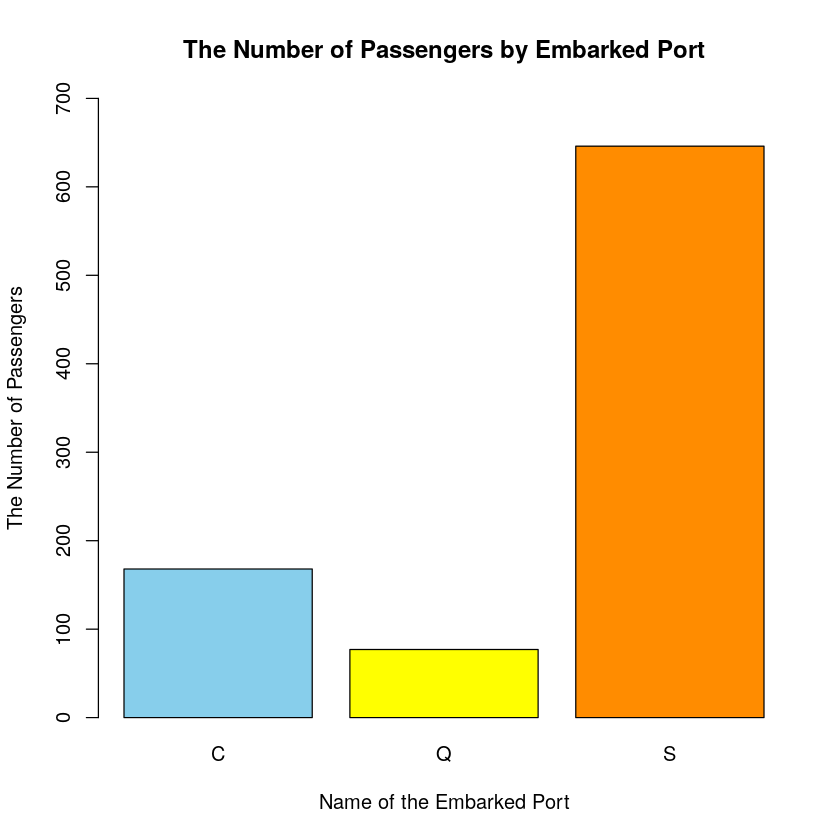

In [71]:
barplot(table_barEmb,
       ylim = c(0,700),
       main = "The Number of Passengers by Embarked Port",
       xlab = "Name of the Embarked Port",
       ylab = "The Number of Passengers",
       col = c("sky blue", "yellow", "dark orange"),
       #legend.text = T
       )

In [72]:
table_barEmbSex <- table(tTrain.order$Sex, tTrain.order$Embarked)
table_barEmbSex

        
           C   Q   S
  female  73  36 205
  male    95  41 441

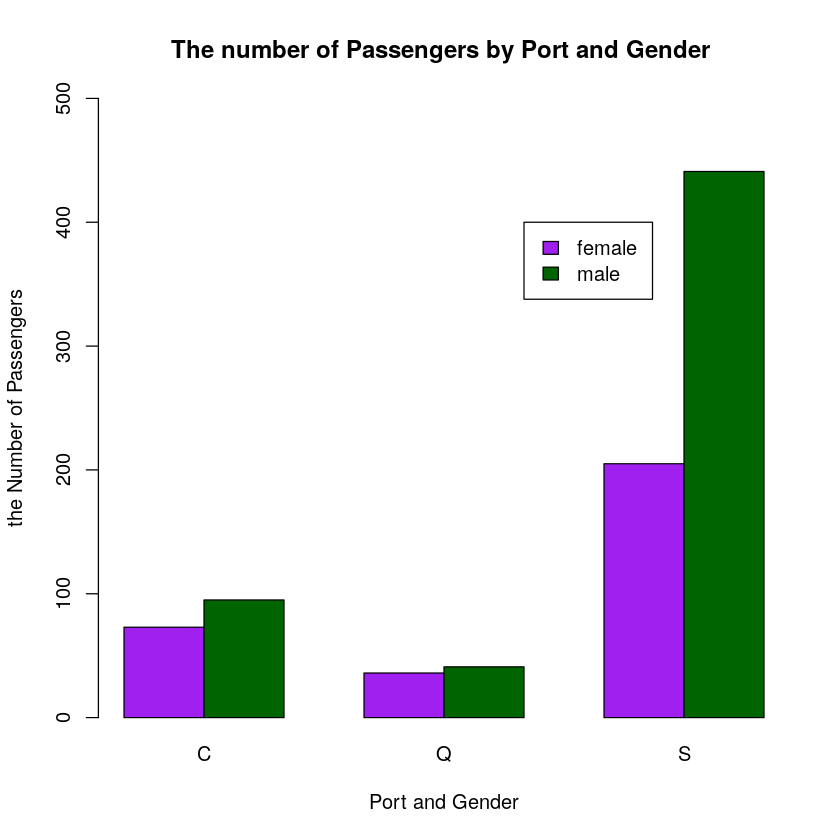

In [73]:
barplot(table_barEmbSex, 
        beside = T,
        main = "The number of Passengers by Port and Gender ",
        col = c("purple", "dark green"),    
       xlab = "Port and Gender",
       ylab = "the Number of Passengers",
        ylim = c(0,500),
#        legend.text=T    
       )

legend(6,400,                       
       c("female", "male"),
      fill = c("purple", "dark green")
      )  

In [74]:
table(tTrain.order$Embarked, tTrain.order$Sex)

   
    female male
  C     73   95
  Q     36   41
  S    205  441

In overall, the number of male passengers exceeds that of female riders. In particluar, the male passengers are more than twice as much as the female passengers in S.

In [75]:
# Survived by Embarked

table_SurEmb <- table(tTrain.order$Survived, tTrain.order$Embarked)
table_SurEmb

   
      C   Q   S
  0  75  47 427
  1  93  30 219

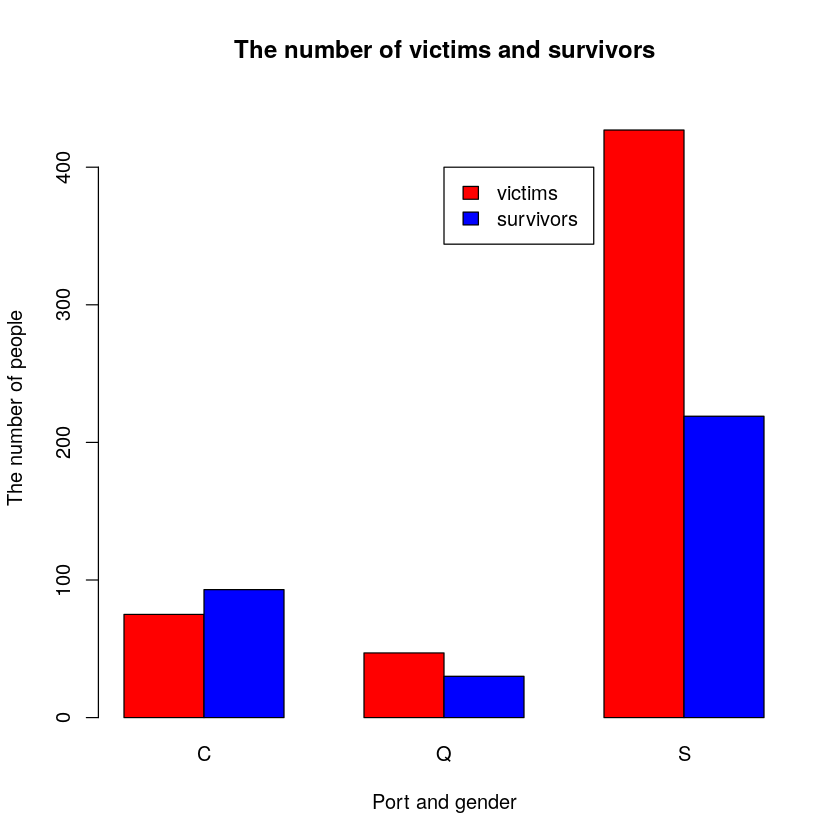

In [76]:
barplot(table_SurEmb, 
        beside = T,
        main = "The number of victims and survivors",
        col = c("red", "blue"),     
       xlab = "Port and gender",
       ylab = "The number of people",
        ylim = c(0,450),
#        legend.text=T    
       )

legend(5,400,                       
       c("victims", "survivors"),
      fill = c("red", "blue")
      )  

The number of survivors are higher than that of victims in C, while Q and S shows opposite results. In particluar, the number of victim in S is almost twice as much as survivors.

In [77]:
# Passengers by port and class
table_PclassEmb <- table(tTrain.order$Pclass, tTrain.order$Embarked)
table_PclassEmb

   
      C   Q   S
  1  85   2 129
  2  17   3 164
  3  66  72 353

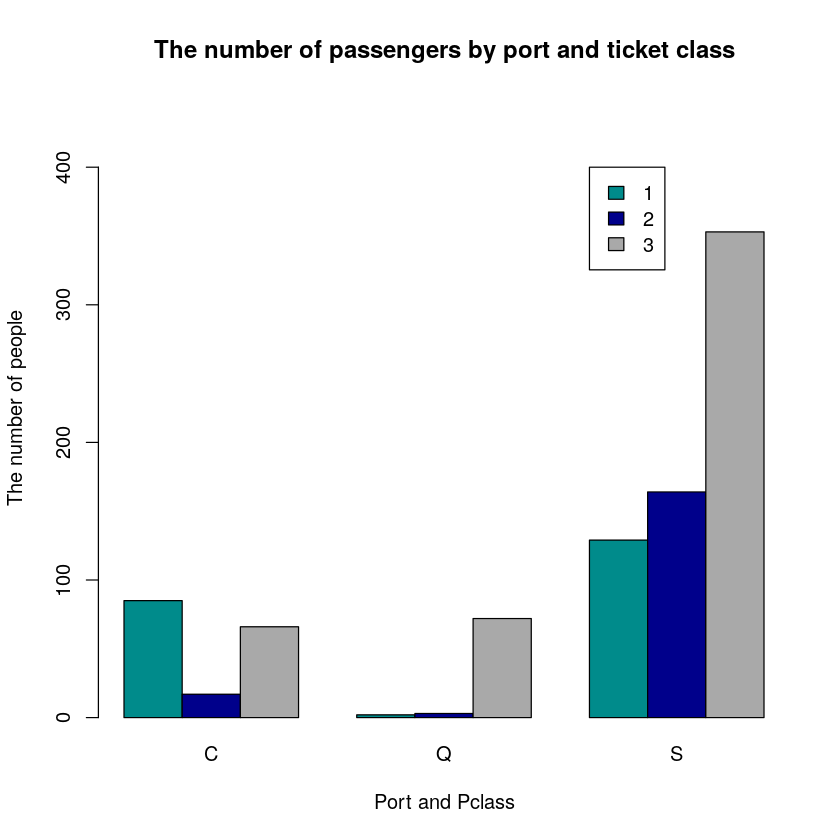

In [78]:
barplot(table_PclassEmb, 
        beside = T,
        main = "The number of passengers by port and ticket class",
        col = c("dark cyan", "dark blue", "dark gray"),     
        xlab = "Port and Pclass",
        ylab = "The number of people",
        ylim = c(0,450),
#        legend.text=T    
       )

legend(9,400,                       
       c("1", "2", "3"),
      fill = c("dark cyan", "dark blue", "dark gray")
      ) 

=> use in trainData

In [79]:
par(mflow = c(2, 2))

Warning message in par(mflow = c(2, 2)):
“"mflow" is not a graphical parameter”


[1] 1 2 3 4

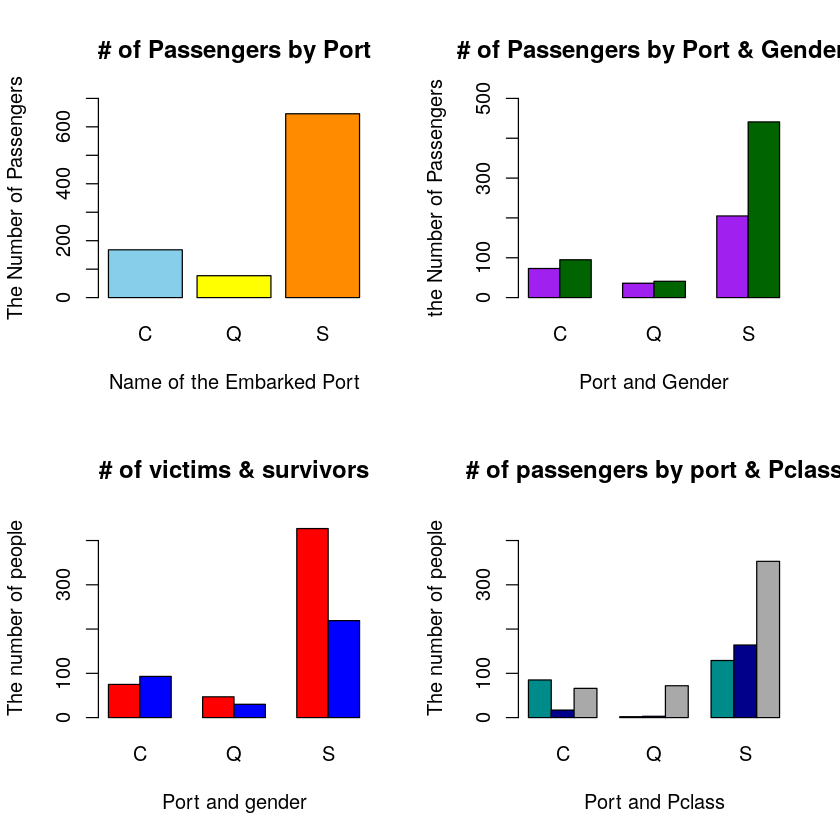

In [80]:
split.screen(c(2,2))




screen(1)
barplot(table_barEmb,
       ylim = c(0,700),
       main = "# of Passengers by Port",
       xlab = "Name of the Embarked Port",
       ylab = "The Number of Passengers",
       col = c("sky blue", "yellow", "dark orange"),
       #legend.text = T
       )

screen(2)
barplot(table_barEmbSex, 
        beside = T,
        main = "# of Passengers by Port & Gender ",
        col = c("purple", "dark green"),    
       xlab = "Port and Gender",
       ylab = "the Number of Passengers",
        ylim = c(0,500),
#        legend.text=T    
       )

screen(3)
barplot(table_SurEmb, 
        beside = T,
        main = "# of victims & survivors",
        col = c("red", "blue"),     
       xlab = "Port and gender",
       ylab = "The number of people",
        ylim = c(0,450),
#        legend.text=T    
       )


screen(4)
barplot(table_PclassEmb, 
        beside = T,
        main = "# of passengers by port & Pclass",
        col = c("dark cyan", "dark blue", "dark gray"),     
        xlab = "Port and Pclass",
        ylab = "The number of people",
        ylim = c(0,450),
#        legend.text=T    
       )

- More than half of the passengers boarded Titanic in Southampton (S).
- About 70% of passengers boarded in S were male. Since the survival rate of male is significantly lower than that of female, the survival rate is S records also very low.
- About 60% of passengers boarded in S had ticket class 3.
- The passengers in  Chersbourg (C) shows the highest percentage of first-class cabin and the highest survival rates.

=> So, we will use these columns : Survived, Pclass, (Fare), Sex, and Embarked.

# Data Restructuring

## Select only relevant columns

In [81]:
trainData_col <- c("Survived", "Pclass", "Fare", "Sex", "Embarked")
trainData <- tTrain.order[trainData_col]
head(trainData)

,Survived,Pclass,Fare,Sex,Embarked
,<int>,<int>,<dbl>,<fct>,<fct>
1,0,3,7.2500,male,S
2,0,3,8.0500,male,S
3,0,3,8.4583,male,Q
4,0,1,51.8625,male,S
5,0,3,21.0750,male,S
6,0,3,8.0500,male,S


## Convert characters into numbers

In [82]:
trainData$SexCode[trainData$Sex == "male"] <- 0   # add SexCode column
trainData$SexCode[trainData$Sex == "female"] <- 1
head(trainData)

,Survived,Pclass,Fare,Sex,Embarked,SexCode
,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>
1,0,3,7.2500,male,S,0
2,0,3,8.0500,male,S,0
3,0,3,8.4583,male,Q,0
4,0,1,51.8625,male,S,0
5,0,3,21.0750,male,S,0
6,0,3,8.0500,male,S,0


In [83]:
str(trainData)

'data.frame':	891 obs. of  6 variables:
 $ Survived: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass  : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Fare    : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...
 $ SexCode : num  0 0 0 0 0 0 0 1 0 1 ...


## Convert integer into factor for target value

Otherwise, some Machine Learning tools like randomForest might guess Survived as a number.

In [84]:
trainData$Survived <- as.factor(trainData$Survived)
str(trainData)

'data.frame':	891 obs. of  6 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass  : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Fare    : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...
 $ SexCode : num  0 0 0 0 0 0 0 1 0 1 ...


## Reselect only relevant columns

In [85]:
trainData_col_code <- c("Survived", "Pclass", "Fare", "SexCode", "Embarked") #to exclude Sex
trainData <- trainData[trainData_col_code]

## One hot encoding

In [86]:
trainData$Embarked_C <- trainData$Embarked == "C"
trainData$Embarked_Q <- trainData$Embarked == "Q"
trainData$Embarked_S <- trainData$Embarked == "S"
head(trainData)

,Survived,Pclass,Fare,SexCode,Embarked,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<lgl>
1,0,3,7.2500,0,S,FALSE,FALSE,TRUE
2,0,3,8.0500,0,S,FALSE,FALSE,TRUE
3,0,3,8.4583,0,Q,FALSE,TRUE,FALSE
4,0,1,51.8625,0,S,FALSE,FALSE,TRUE
5,0,3,21.0750,0,S,FALSE,FALSE,TRUE
6,0,3,8.0500,0,S,FALSE,FALSE,TRUE


## Complete Dataset

In [87]:
colTrain <- c("Survived", "Pclass", "SexCode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S") 
trainData.selected <- trainData[colTrain]
# trainData[-5]
head(trainData.selected)

,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,3,0,7.2500,FALSE,FALSE,TRUE
2,0,3,0,8.0500,FALSE,FALSE,TRUE
3,0,3,0,8.4583,FALSE,TRUE,FALSE
4,0,1,0,51.8625,FALSE,FALSE,TRUE
5,0,3,0,21.0750,FALSE,FALSE,TRUE
6,0,3,0,8.0500,FALSE,FALSE,TRUE


# Machine Learning

It is time to run Machine Learning with selected column data.class.  
Firstly, as it is in the dataset, we will start with training with victims : survivors = 7 : 3.  
Secondly, let's adjust the proportion into 5 : 5 to see if there is any significant difference in prediction.  
Thirdly, we can also run machine learning without fare columns to see if the column is helpful or not.  


In [88]:
library(party)
library(caret)
library(e1071)
library(randomForest)
library(nnet)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




## Case 1: Original data

### Select only relevant columns

In [89]:
str(trainData.selected)

'data.frame':	891 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Fare      : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...


In [90]:
colTrain <- c("Survived", "Pclass", "SexCode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S") #to exclude Fare
trainData <- trainData[colTrain]
# trainData[-5]
head(trainData)

,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,3,0,7.2500,FALSE,FALSE,TRUE
2,0,3,0,8.0500,FALSE,FALSE,TRUE
3,0,3,0,8.4583,FALSE,TRUE,FALSE
4,0,1,0,51.8625,FALSE,FALSE,TRUE
5,0,3,0,21.0750,FALSE,FALSE,TRUE
6,0,3,0,8.0500,FALSE,FALSE,TRUE


### Split data into train and test sets

In [91]:
nrow(subset(trainData, Survived == 0))
nrow(subset(trainData, Survived == 1))

nrow(subset(trainData, Survived == 0))*0.7 # 384
nrow(subset(trainData, Survived == 1))*0.7 # 239

[1] 549

[1] 342

[1] 384.3

[1] 239.4

In [92]:
set.seed(123456)
samp <- c(sample(1:549, 384), sample(550:891, 239))
data.train <- trainData[samp,]
data.test  <- trainData[-samp,]
# head(data.train)
# head(data.test)

### Create features and targets

In [93]:
data.features <- subset(data.test, select = -Survived) # test the trained model
data.targets  <- subset(data.test, select = Survived)  # answer

### Implement Machine Learning

#### Prepare Data and parameters

In [94]:
data = data.train             # train: data contains questions and answers 
feature = data.features           # question data
target = data.targets$Survived    # answer data

ntree = 100 # randomForest
size = 7    # Neutal Network
formula <- Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + Embarked_S # cTree

#### randomForest

In [95]:
##### Training

rf <- randomForest(Survived ~., data, ntree = 100)
rf

##### predict

pred <- predict(rf, feature)

##### Accuracy
rf.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table

rf.table <- as.matrix(table(pred, target))
rf.table

##### Accuracy of each category
rf.Result_V <- round((rf.table[1,1])/sum(rf.table[,1])*100, 2)
rf.Result_S <- round((rf.table[2,2])/sum(rf.table[,2])*100, 2)


#### Summary
cat(paste("randomForest (total)  ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)      ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)      ", rf.Result_S, "%"), "\n")



Call:
 randomForest(formula = Survived ~ ., data = data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17.98%
Confusion matrix:
    0   1 class.error
0 366  18   0.0468750
1  94 145   0.3933054

    target
pred   0   1
   0 150  44
   1  15  59

randomForest (total)   77.99 % 
randomForest (V)       90.91 % 
randomForest (S)       57.28 % 


#### nnet Neural Networks

In [96]:
#### Training
nnmodel <- nnet(Survived ~. , data, size = size)
nnmodel

#### Predict
pred <- predict(nnmodel, feature, type = "class")

##### Accuracy
nnet.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table
nnet.table <- as.matrix(table(pred, target))
nnet.table

##### Accuracy of each category
nnet.Result_V <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
nnet.Result_S <- round((nnet.table[2,2])/sum(nnet.table[,2])*100, 2)

#### Summary
cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")

# weights:  57
initial  value 675.706752 
iter  10 value 382.200401
iter  20 value 309.805227
iter  30 value 304.516697
iter  40 value 266.955464
iter  50 value 253.769496
iter  60 value 250.608736
iter  70 value 249.562305
iter  80 value 248.545592
iter  90 value 246.419419
iter 100 value 245.206566
final  value 245.206566 
stopped after 100 iterations


a 6-7-1 network with 57 weights
inputs: Pclass SexCode Fare Embarked_CTRUE Embarked_QTRUE Embarked_STRUE 
output(s): Survived 
options were - entropy fitting 

    target
pred   0   1
   0 153  45
   1  12  58

Neural Networks (total)    78.73 % 
Neural Networks (V)        92.73 % 
Neural Networks(S)         56.31 % 


#### SVM

In [97]:
#### Training
svmmodel <- svm(Survived ~. , data)
svmmodel

#### Predict
pred <- predict(svmmodel, feature)

#### Accuracy
svm.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
svm.table <- as.matrix(table(pred, target))

##### Accuracy of each category
svm.Result_V <- round((svm.table[1,1])/sum(svm.table[,1])*100, 2)
svm.Result_S <- round((svm.table[2,2])/sum(svm.table[,2])*100, 2)

#### Summary
cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")


Call:
svm(formula = Survived ~ ., data = data)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  276


    target
pred   0   1
   0 154  44
   1  11  59

SVM (total)                79.48 % 
SVM (V)                    93.33 % 
SVM (S)                    57.28 % 


#### cTree

In [100]:
#### Training
ctmodel <- ctree(formula, data)

#### Predict
pred <- predict(ctmodel, feature)

#### Accuracy
ct.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
ct.table <- as.matrix(table(pred, target))

##### Accuracy of each category
ct.Result_V <- round((ct.table[1,1])/sum(ct.table[,1])*100, 2)
ct.Result_S <- round((ct.table[2,2])/sum(ct.table[,2])*100, 2)

#### Summary
cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")

    target
pred   0   1
   0 146  38
   1  19  65

cTree (total)              78.73 % 
cTree (V)                  88.48 % 
cTree (S)                  63.11 % 


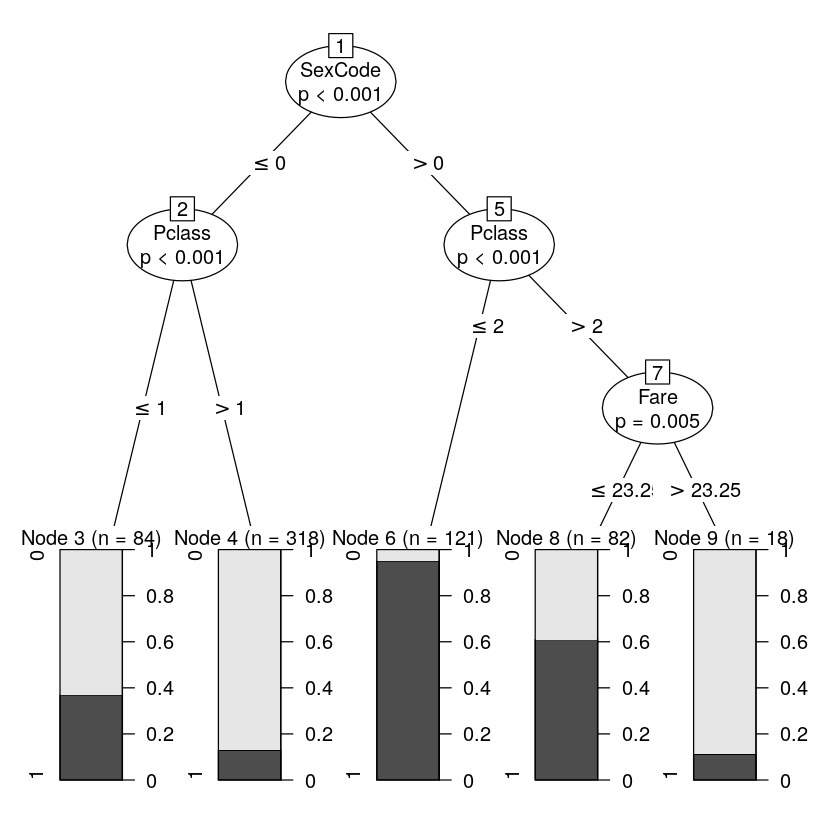

In [101]:
plot(ctmodel, 
     #type = 'simple'
    )

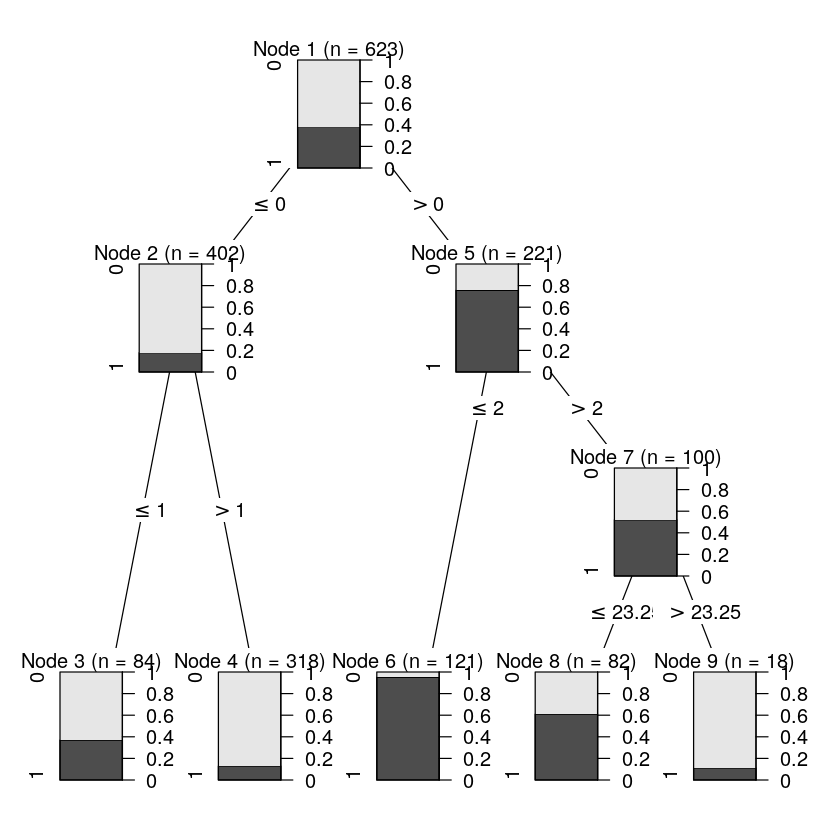

In [102]:
plot(ctmodel,
     inner_panel = node_barplot,
     #edge_panel = function(...) invisible(),
     tnex = 1)

#### Logistic Regression

In [103]:
##### Training

logistRegModel <- multinom(Survived ~., data = data)

##### Predict

pred <- predict(logistRegModel, feature)

#### Accuracy
lr.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
lr.table <- as.matrix(table(pred, target))

##### Accuracy of each category
lr.Result_V <- round((lr.table[1,1])/sum(lr.table[,1])*100, 2)
lr.Result_S <- round((lr.table[2,2])/sum(lr.table[,2])*100, 2)

#### Summary
cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

# weights:  8 (7 variable)
initial  value 431.830693 
iter  10 value 271.323653
final  value 271.322893 
converged


    target
pred   0   1
   0 127  31
   1  38  72

Logistic Regreion (total)  74.25 % 
Logistic Regreion (V)      76.97 % 
Logistic Regreion (S)      69.9 % 


### Case 1) Summary

In [104]:
cat(paste("randomForest (total)      ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)          ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)          ", rf.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")


randomForest (total)       77.99 % 
randomForest (V)           90.91 % 
randomForest (S)           57.28 % 
Neural Networks (total)    78.73 % 
Neural Networks (V)        92.73 % 
Neural Networks(S)         56.31 % 
SVM (total)                79.48 % 
SVM (V)                    93.33 % 
SVM (S)                    57.28 % 
cTree (total)              78.73 % 
cTree (V)                  88.48 % 
cTree (S)                  63.11 % 
Logistic Regreion (total)  74.25 % 
Logistic Regreion (V)      76.97 % 
Logistic Regreion (S)      69.9 % 


In [105]:
## set.seed(12)
# randomForest (total)       79.85 % 
# randomForest (V)           96.36 % 
# randomForest (S)           53.4 % 
# ================================== 
# Neural Networks (total)    77.61 % 
# Neural Networks (V)        95.15 % 
# Neural Networks(S)         49.51 % 
# ================================== 
# SVM (total)                80.97 % <-
# SVM (V)                    95.15 % 
# SVM (S)                    58.25 % 
# ================================== 
# cTree (total)              76.49 % 
# cTree (V)                  98.18 % 
# cTree (S)                  41.75 % 
# ================================== 
# Logistic Regreion (total)  76.49 % 
# Logistic Regreion (V)      83.03 % 
# Logistic Regreion (S)      66.02 % 

## set.seed(123)
# randomForest (total)       79.1 %  <-
# randomForest (V)           93.33 % 
# randomForest (S)           56.31 % 
# ================================== 
# Neural Networks (total)    76.87 % 
# Neural Networks (V)        90.3 % 
# Neural Networks(S)         55.34 % 
# ================================== 
# SVM (total)                78.36 % 
# SVM (V)                    93.33 % 
# SVM (S)                    54.37 % 
# ================================== 
# cTree (total)              78.36 % 
# cTree (V)                  93.33 % 
# cTree (S)                  54.37 % 
# ================================== 
# Logistic Regreion (total)  76.87 % 
# Logistic Regreion (V)      80.61 % 
# Logistic Regreion (S)      70.87 % 

## set.seed(1234)
# randomForest (total)       79.85 % <-
# randomForest (V)           93.33 % 
# randomForest (S)           58.25 % 
# ================================== 
# Neural Networks (total)    79.48 % 
# Neural Networks (V)        92.73 % 
# Neural Networks(S)         58.25 % 
# ================================== 
# SVM (total)                79.85 % <-
# SVM (V)                    93.33 % 
# SVM (S)                    58.25 % 
# ================================== 
# cTree (total)              79.85 % <-
# cTree (V)                  93.33 % 
# cTree (S)                  58.25 % 
# ================================== 
# Logistic Regreion (total)  79.48 % 
# Logistic Regreion (V)      83.64 % 
# Logistic Regreion (S)      72.82 % 

## set.seed(12345)
# randomForest (total)       79.48 % 
# randomForest (V)           95.15 % 
# randomForest (S)           54.37 % 
# ================================== 
# Neural Networks (total)    78.36 % 
# Neural Networks (V)        92.12 % 
# Neural Networks(S)         56.31 % 
# ================================== 
# SVM (total)                79.85 % <-
# SVM (V)                    94.55 % 
# SVM (S)                    56.31 % 
# ================================== 
# cTree (total)              79.48 % 
# cTree (V)                  94.55 % 
# cTree (S)                  55.34 % 
# ================================== 
# Logistic Regreion (total)  78.36 % 
# Logistic Regreion (V)      83.03 % 
# Logistic Regreion (S)      70.87 % 

## set.seed(123456)
# randomForest (total)       77.99 % 
# randomForest (V)           90.91 % 
# randomForest (S)           57.28 % 
# ================================== 
# Neural Networks (total)    79.48 % <-
# Neural Networks (V)        93.33 % 
# Neural Networks(S)         57.28 % 
# ================================== 
# SVM (total)                79.48 % <-
# SVM (V)                    93.33 % 
# SVM (S)                    57.28 % 
# ================================== 
# cTree (total)              78.73 % 
# cTree (V)                  88.48 % 
# cTree (S)                  63.11 % 
# ================================== 
# Logistic Regreion (total)  74.25 % 
# Logistic Regreion (V)      76.97 % 
# Logistic Regreion (S)      69.9 %

## Case 2: Sampling adjustment as victims : survivors = 1 : 1

### Adjust Sampling data as victims : survivors = 1 : 1

In [106]:
nrow(subset(trainData, Survived == 0))
nrow(subset(trainData, Survived == 1))

nrow(subset(trainData, Survived == 1))*0.7 # 239

[1] 549

[1] 342

[1] 239.4

In [107]:
set.seed(12345)
sampRatio <- c(sample(1:549, 342), sample(550:891, 342))
samePropData <- trainData[sampRatio,]

### orderBy Survived and reset rownames

In [108]:
samePropData.ORD <- orderBy(~Survived, samePropData) 
rownames(samePropData.ORD) <- c()
head(samePropData.ORD)
tail(samePropData.ORD)

,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,2,0,27.0000,FALSE,FALSE,TRUE
2,0,3,0,8.0500,FALSE,FALSE,TRUE
3,0,2,1,13.0000,FALSE,FALSE,TRUE
4,0,2,0,26.0000,FALSE,FALSE,TRUE
5,0,3,0,7.2292,TRUE,FALSE,FALSE
6,0,2,0,13.0000,FALSE,FALSE,TRUE


,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
679,1,2,1,26.0000,FALSE,FALSE,TRUE
680,1,3,1,7.2500,FALSE,FALSE,TRUE
681,1,1,1,164.8667,FALSE,FALSE,TRUE
682,1,3,1,7.7500,FALSE,TRUE,FALSE
683,1,2,1,41.5792,TRUE,FALSE,FALSE
684,1,2,1,21.0000,FALSE,FALSE,TRUE


### spilit data into train and test set

In [109]:
newSamp <-c(sample(1:342, 239), sample(343:684, 239))
data.train <- samePropData.ORD[newSamp,]
data.test <- samePropData.ORD[-newSamp,]

In [110]:
str(data.train)

'data.frame':	478 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 3 3 3 1 2 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 0 1 0 ...
 $ Fare      : num  7.78 8.05 7.75 69.55 7.9 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE TRUE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE FALSE FALSE ...


In [111]:
str(data.test)

'data.frame':	206 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  2 2 3 3 1 3 3 3 3 3 ...
 $ SexCode   : num  0 0 1 0 0 0 0 1 0 1 ...
 $ Fare      : num  27 26 24.1 7.9 263 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


### Create features and targets

In [112]:
data.features <- subset(data.test, select = -Survived) # test the trained model
data.targets  <- subset(data.test, select = Survived)  # answer

### Implement Machine Learning with adjusted data

In [113]:
data = data.train             # train: data contains questions and answers 
feature = data.features           # question data
target = data.targets$Survived    # answer data

ntree = 100 # randomForest
size = 7    # Neutal Network
formula <- Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + Embarked_S # cTree

In [114]:
summary(target)

0   1 
103 103

#### randomForest

In [115]:
##### Training

rf <- randomForest(Survived ~., data, ntree = 100)
rf

##### predict

pred <- predict(rf, feature)

##### Accuracy
rf.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table

rf.table <- as.matrix(table(pred, target))
rf.table

##### Accuracy of each category
rf.Result_V <- round((rf.table[1,1])/sum(rf.table[,1])*100, 2)
rf.Result_S <- round((rf.table[2,2])/sum(rf.table[,2])*100, 2)

#### Summary
cat(paste("randomForest (total)  ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)      ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)      ", rf.Result_S, "%"), "\n")


Call:
 randomForest(formula = Survived ~ ., data = data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 26.99%
Confusion matrix:
    0   1 class.error
0 187  52   0.2175732
1  77 162   0.3221757

    target
pred  0  1
   0 83 24
   1 20 79

randomForest (total)   78.64 % 
randomForest (V)       80.58 % 
randomForest (S)       76.7 % 


#### Neural Networks

In [116]:
#### Training
nnmodel <- nnet(Survived ~. , data, size = size)
nnmodel

#### Predict
pred <- predict(nnmodel, feature, type = "class")

##### Accuracy
nnet.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table
nnet.table <- as.matrix(table(pred, target))
nnet.table

##### Accuracy of each category
nnet.Result_V <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
nnet.Result_S <- round((nnet.table[2,2])/sum(nnet.table[,2])*100, 2)

#### Summary
cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")

# weights:  57
initial  value 442.360539 
iter  10 value 300.318812
iter  20 value 255.638790
iter  30 value 227.610408
iter  40 value 222.546113
iter  50 value 220.429456
iter  60 value 220.065441
iter  70 value 220.030821
iter  80 value 219.998325
iter  90 value 219.808105
iter 100 value 219.192109
final  value 219.192109 
stopped after 100 iterations


a 6-7-1 network with 57 weights
inputs: Pclass SexCode Fare Embarked_CTRUE Embarked_QTRUE Embarked_STRUE 
output(s): Survived 
options were - entropy fitting 

    target
pred  0  1
   0 98 44
   1  5 59

Neural Networks (total)    76.21 % 
Neural Networks (V)        95.15 % 
Neural Networks(S)         57.28 % 


#### SVM

In [117]:
#### Training
svmmodel <- svm(Survived ~. , data)
svmmodel

#### Predict
pred <- predict(svmmodel, feature)

#### Accuracy
svm.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
svm.table <- as.matrix(table(pred, target))

##### Accuracy of each category
svm.Result_V <- round((svm.table[1,1])/sum(svm.table[,1])*100, 2)
svm.Result_S <- round((svm.table[2,2])/sum(svm.table[,2])*100, 2)

#### Summary
cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")


Call:
svm(formula = Survived ~ ., data = data)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  247


    target
pred  0  1
   0 86 31
   1 17 72

SVM (total)                76.7 % 
SVM (V)                    83.5 % 
SVM (S)                    69.9 % 


#### cTree

In [118]:
#### Training
ctmodel <- ctree(formula, data)

#### Predict
pred <- predict(ctmodel, feature)

#### Accuracy
ct.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
ct.table <- as.matrix(table(pred, target))

##### Accuracy of each category
ct.Result_V <- round((ct.table[1,1])/sum(ct.table[,1])*100, 2)
ct.Result_S <- round((ct.table[2,2])/sum(ct.table[,2])*100, 2)

#### Summary
cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")

    target
pred   0   1
   0 100  45
   1   3  58

cTree (total)              76.7 % 
cTree (V)                  97.09 % 
cTree (S)                  56.31 % 


#### Logistic Regression

In [119]:
##### Training

logistRegModel <- multinom(Survived ~., data = data)

##### Predict

pred <- predict(logistRegModel, feature)

#### Accuracy
lr.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
lr.table <- as.matrix(table(pred, target))

##### Accuracy of each category
lr.Result_V <- round((lr.table[1,1])/sum(lr.table[,1])*100, 2)
lr.Result_S <- round((lr.table[2,2])/sum(lr.table[,2])*100, 2)

#### Summary
cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

# weights:  8 (7 variable)
initial  value 331.324352 
iter  10 value 236.119496
final  value 236.119058 
converged


    target
pred  0  1
   0 80 25
   1 23 78

Logistic Regreion (total)  76.7 % 
Logistic Regreion (V)      77.67 % 
Logistic Regreion (S)      75.73 % 


### Summary

In [120]:
cat(paste("randomForest (total)      ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)          ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)          ", rf.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")


randomForest (total)       78.64 % 
randomForest (V)           80.58 % 
randomForest (S)           76.7 % 
Neural Networks (total)    76.21 % 
Neural Networks (V)        95.15 % 
Neural Networks(S)         57.28 % 
SVM (total)                76.7 % 
SVM (V)                    83.5 % 
SVM (S)                    69.9 % 
cTree (total)              76.7 % 
cTree (V)                  97.09 % 
cTree (S)                  56.31 % 
Logistic Regreion (total)  76.7 % 
Logistic Regreion (V)      77.67 % 
Logistic Regreion (S)      75.73 % 


In [121]:
# cf) Original Dataset
# # set.seed(12345)
# randomForest (total)       79.48 % 
# randomForest (V)           95.15 % 
# randomForest (S)           54.37 % 
# ================================== 
# Neural Networks (total)    78.36 % 
# Neural Networks (V)        92.12 % 
# Neural Networks(S)         56.31 % 
# ================================== 
# SVM (total)                79.85 % <-
# SVM (V)                    94.55 % 
# SVM (S)                    56.31 % 
# ================================== 
# cTree (total)              79.48 % 
# cTree (V)                  94.55 % 
# cTree (S)                  55.34 % 
# ================================== 
# Logistic Regreion (total)  78.36 % 
# Logistic Regreion (V)      83.03 % 
# Logistic Regreion (S)      70.87 % 

## V:S = 5:5
# # set.seed(12345)
# randomForest (total)       78.64 % <-
# randomForest (V)           86.41 % 
# randomForest (S)           70.87 % 
# ================================== 
# Neural Networks (total)    75.73 % 
# Neural Networks (V)        89.32 % 
# Neural Networks(S)         62.14 % 
# ================================== 
# SVM (total)                76.7 % 
# SVM (V)                    83.5 % 
# SVM (S)                    69.9 % 
# ================================== 
# cTree (total)              76.7 % 
# cTree (V)                  97.09 % 
# cTree (S)                  56.31 % 
# ================================== 
# Logistic Regreion (total)  76.7 % 
# Logistic Regreion (V)      77.67 % 
# Logistic Regreion (S)      75.73 % 

In general, ML with original dataset shows better prediction result, while the accuracy of survivors is higher in adjusted dataset. So, let's keep the original dataset and see how the result is going to differ without Fare column.

## Case 3: dataset without Fare Column

### Select relevant columns (excluding Fare)

In [122]:
colTrain_noFare <- c("Survived", "Pclass", "SexCode", "Embarked_C", "Embarked_Q", "Embarked_S") #to exclude Fare
trainData <- trainData[colTrain_noFare]
head(trainData)

,Survived,Pclass,SexCode,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,3,0,FALSE,FALSE,TRUE
2,0,3,0,FALSE,FALSE,TRUE
3,0,3,0,FALSE,TRUE,FALSE
4,0,1,0,FALSE,FALSE,TRUE
5,0,3,0,FALSE,FALSE,TRUE
6,0,3,0,FALSE,FALSE,TRUE


### Spilit data into train and test set

In [123]:
nrow(subset(trainData, Survived == 0))
nrow(subset(trainData, Survived == 1))

nrow(subset(trainData, Survived == 0))*0.7 # 384
nrow(subset(trainData, Survived == 1))*0.7 # 239

set.seed(12)
samp <- c(sample(1:549, 384), sample(550:891, 239))
data.train <- trainData[samp,]
data.test  <- trainData[-samp,]
# head(data.train)
# head(data.test)

[1] 549

[1] 342

[1] 384.3

[1] 239.4

### Create features and targers

In [124]:
data.features <- subset(data.test, select = -Survived) # test the trained model
data.targets  <- subset(data.test, select = Survived)  # answer

### Implement Machine Learning

In [125]:
data = data.train             # train: data contains questions and answers 
feature = data.features           # question data
target = data.targets$Survived    # answer data

ntree = 100 # randomForest
size = 7    # Neutal Network
formula <- Survived ~ Pclass + SexCode + Embarked_C + Embarked_Q + Embarked_S # cTree

#### randomForest

In [126]:
##### Training

rf <- randomForest(Survived ~., data, ntree = 100)
rf

##### predict

pred <- predict(rf, feature)

##### Accuracy
rf.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table

rf.table <- as.matrix(table(pred, target))
rf.table

##### Accuracy of each category
rf.Result_V <- round((rf.table[1,1])/sum(rf.table[,1])*100, 2)
rf.Result_S <- round((rf.table[2,2])/sum(rf.table[,2])*100, 2)

#### Summary
cat(paste("randomForest (total)  ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)      ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)      ", rf.Result_S, "%"), "\n")


Call:
 randomForest(formula = Survived ~ ., data = data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.1%
Confusion matrix:
    0   1 class.error
0 368  16  0.04166667
1 103 136  0.43096234

    target
pred   0   1
   0 158  51
   1   7  52

randomForest (total)   78.36 % 
randomForest (V)       95.76 % 
randomForest (S)       50.49 % 


#### Neural Networks

In [127]:
#### Training
nnmodel <- nnet(Survived ~. , data, size = size)
nnmodel

#### Predict
pred <- predict(nnmodel, feature, type = "class")

##### Accuracy
nnet.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table
nnet.table <- as.matrix(table(pred, target))
nnet.table

##### Accuracy of each category
nnet.Result_V <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
nnet.Result_S <- round((nnet.table[2,2])/sum(nnet.table[,2])*100, 2)

#### Summary
cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")

# weights:  50
initial  value 467.346281 
iter  10 value 269.084197
iter  20 value 264.890301
iter  30 value 264.606971
iter  40 value 264.315353
iter  50 value 264.244322
iter  60 value 264.228415
iter  70 value 264.170689
iter  80 value 264.145068
iter  90 value 264.122448
iter 100 value 264.110369
final  value 264.110369 
stopped after 100 iterations


a 5-7-1 network with 50 weights
inputs: Pclass SexCode Embarked_CTRUE Embarked_QTRUE Embarked_STRUE 
output(s): Survived 
options were - entropy fitting 

    target
pred   0   1
   0 157  44
   1   8  59

Neural Networks (total)    80.6 % 
Neural Networks (V)        95.15 % 
Neural Networks(S)         57.28 % 


#### SVM

In [128]:
#### Training
svmmodel <- svm(Survived ~. , data)
svmmodel

#### Predict
pred <- predict(svmmodel, feature)

#### Accuracy
svm.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
svm.table <- as.matrix(table(pred, target))

##### Accuracy of each category
svm.Result_V <- round((svm.table[1,1])/sum(svm.table[,1])*100, 2)
svm.Result_S <- round((svm.table[2,2])/sum(svm.table[,2])*100, 2)

#### Summary
cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")


Call:
svm(formula = Survived ~ ., data = data)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  265


    target
pred   0   1
   0 159  53
   1   6  50

SVM (total)                77.99 % 
SVM (V)                    96.36 % 
SVM (S)                    48.54 % 


#### cTree

In [129]:
#### Training
ctmodel <- ctree(formula, data)

#### Predict
pred <- predict(ctmodel, feature)

#### Accuracy
ct.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
ct.table <- as.matrix(table(pred, target))

##### Accuracy of each category
ct.Result_V <- round((ct.table[1,1])/sum(ct.table[,1])*100, 2)
ct.Result_S <- round((ct.table[2,2])/sum(ct.table[,2])*100, 2)

#### Summary
cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")

    target
pred   0   1
   0 159  53
   1   6  50

cTree (total)              77.99 % 
cTree (V)                  96.36 % 
cTree (S)                  48.54 % 


#### Logistic Regression

In [130]:
##### Training

logistRegModel <- multinom(Survived ~., data = data)

##### Predict

pred <- predict(logistRegModel, feature)

#### Accuracy
lr.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
lr.table <- as.matrix(table(pred, target))

##### Accuracy of each category
lr.Result_V <- round((lr.table[1,1])/sum(lr.table[,1])*100, 2)
lr.Result_S <- round((lr.table[2,2])/sum(lr.table[,2])*100, 2)

#### Summary
cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

# weights:  7 (6 variable)
initial  value 431.830693 
iter  10 value 282.254771
final  value 282.254413 
converged


    target
pred   0   1
   0 137  35
   1  28  68

Logistic Regreion (total)  76.49 % 
Logistic Regreion (V)      83.03 % 
Logistic Regreion (S)      66.02 % 


### Summary

In [131]:
cat(paste("randomForest (total)      ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)          ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)          ", rf.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")


randomForest (total)       78.36 % 
randomForest (V)           95.76 % 
randomForest (S)           50.49 % 
Neural Networks (total)    80.6 % 
Neural Networks (V)        95.15 % 
Neural Networks(S)         57.28 % 
SVM (total)                77.99 % 
SVM (V)                    96.36 % 
SVM (S)                    48.54 % 
cTree (total)              77.99 % 
cTree (V)                  96.36 % 
cTree (S)                  48.54 % 
Logistic Regreion (total)  76.49 % 
Logistic Regreion (V)      83.03 % 
Logistic Regreion (S)      66.02 % 


In [132]:
## set.seed(12345)
# randomForest (total)       79.48 % <-
# randomForest (V)           94.55 % 
# randomForest (S)           55.34 % 
# ================================== 
# Neural Networks (total)    79.48 % <-
# Neural Networks (V)        94.55 % 
# Neural Networks(S)         55.34 % 
# ================================== 
# SVM (total)                79.48 % <-
# SVM (V)                    94.55 % 
# SVM (S)                    55.34 % 
# ================================== 
# cTree (total)              79.48 % <-
# cTree (V)                  94.55 % 
# cTree (S)                  55.34 % 
# ================================== 
# Logistic Regreion (total)  78.36 % 
# Logistic Regreion (V)      82.42 % 
# Logistic Regreion (S)      71.84 % 

## set.seed(12)
# randomForest (total)       80.97 % <-
# randomForest (V)           96.36 % 
# randomForest (S)           56.31 % 
# ================================== 
# Neural Networks (total)    78.73 % 
# Neural Networks (V)        90.91 % 
# Neural Networks(S)         59.22 % 
# ================================== 
# SVM (total)                76.12 % 
# SVM (V)                    82.42 % 
# SVM (S)                    66.02 % 
# ================================== 
# cTree (total)              80.97 % <-
# cTree (V)                  96.36 % 
# cTree (S)                  56.31 % 
# ================================== 
# Logistic Regreion (total)  75.37 % 
# Logistic Regreion (V)      81.82 % 
# Logistic Regreion (S)      65.05 % 

## set.seed(1)
# randomForest (total)       80.6 % 
# randomForest (V)           95.15 % 
# randomForest (S)           57.28 % 
# ================================== 
# Neural Networks (total)    80.97 %  <- 
# Neural Networks (V)        96.36 % 
# Neural Networks(S)         56.31 % 
# ================================== 
# SVM (total)                76.12 % 
# SVM (V)                    82.42 % 
# SVM (S)                    66.02 % 
# ================================== 
# cTree (total)              80.97 % <-
# cTree (V)                  96.36 % 
# cTree (S)                  56.31 % 
# ================================== 
# Logistic Regreion (total)  75.37 % 
# Logistic Regreion (V)      81.82 % 
# Logistic Regreion (S)      65.05 % 

We are going to choose randomForest which shows relatively and stably high accuracy.

# Predict Survived Column in test set.

## Prepare Data

### Prepare training data: entire selected dataset

In [133]:
head(trainData.selected)
summary(trainData.selected)

,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,3,0,7.2500,FALSE,FALSE,TRUE
2,0,3,0,8.0500,FALSE,FALSE,TRUE
3,0,3,0,8.4583,FALSE,TRUE,FALSE
4,0,1,0,51.8625,FALSE,FALSE,TRUE
5,0,3,0,21.0750,FALSE,FALSE,TRUE
6,0,3,0,8.0500,FALSE,FALSE,TRUE


 Survived     Pclass         SexCode            Fare        Embarked_C     
 0:549    Min.   :1.000   Min.   :0.0000   Min.   :  0.00   Mode :logical  
 1:342    1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:  7.91   FALSE:723      
          Median :3.000   Median :0.0000   Median : 14.45   TRUE :168      
          Mean   :2.309   Mean   :0.3524   Mean   : 32.20                  
          3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.: 31.00                  
          Max.   :3.000   Max.   :1.0000   Max.   :512.33                  
 Embarked_Q      Embarked_S     
 Mode :logical   Mode :logical  
 FALSE:814       FALSE:245      
 TRUE :77        TRUE :646      
                                
                                
                                

### Load test dataset and create features

#### Load test data

In [134]:
testTitanic <- read.csv("./Data/titanic/test.csv")
head(testTitanic)
tail(testTitanic)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
413,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,,S
414,1305,3,"Spector, Mr. Woolf",male,NA,0,0,A.5. 3236,8.0500,,S
415,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
416,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,,S
417,1308,3,"Ware, Mr. Frederick",male,NA,0,0,359309,8.0500,,S
418,1309,3,"Peter, Master. Michael J",male,NA,1,1,2668,22.3583,,C


In [135]:
summary(testTitanic)
str(testTitanic)

  PassengerId         Pclass     
 Min.   : 892.0   Min.   :1.000  
 1st Qu.: 996.2   1st Qu.:1.000  
 Median :1100.5   Median :3.000  
 Mean   :1100.5   Mean   :2.266  
 3rd Qu.:1204.8   3rd Qu.:3.000  
 Max.   :1309.0   Max.   :3.000  
                                 
                                        Name         Sex           Age       
 Abbott, Master. Eugene Joseph            :  1   female:152   Min.   : 0.17  
 Abelseth, Miss. Karen Marie              :  1   male  :266   1st Qu.:21.00  
 Abelseth, Mr. Olaus Jorgensen            :  1                Median :27.00  
 Abrahamsson, Mr. Abraham August Johannes :  1                Mean   :30.27  
 Abrahim, Mrs. Joseph (Sophie Halaut Easu):  1                3rd Qu.:39.00  
 Aks, Master. Philip Frank                :  1                Max.   :76.00  
 (Other)                                  :412                NA's   :86     
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0000   Min.   :0.0000   P

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : Factor w/ 418 levels "Abbott, Master. Eugene Joseph",..: 210 409 273 414 182 370 85 58 5 104 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : Factor w/ 363 levels "110469","110489",..: 153 222 74 148 139 262 159 85 101 270 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : Factor w/ 77 levels "","A11","A18",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


#### Convert characters into numbers

In [136]:
testTitanic$SexCode[testTitanic$Sex == "male"] <- 0   # add SexCode column
testTitanic$SexCode[testTitanic$Sex == "female"] <- 1
head(testTitanic)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,1
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0


#### One-hot encoding

In [137]:
testTitanic$Embarked_C <- testTitanic$Embarked == "C"
testTitanic$Embarked_Q <- testTitanic$Embarked == "Q"
testTitanic$Embarked_S <- testTitanic$Embarked == "S"
head(testTitanic,153)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Embarked_C,Embarked_Q,Embarked_S
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<lgl>,<lgl>,<lgl>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0,FALSE,TRUE,FALSE
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1,FALSE,FALSE,TRUE
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0,FALSE,TRUE,FALSE
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0,FALSE,FALSE,TRUE
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,1,FALSE,FALSE,TRUE
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0,FALSE,FALSE,TRUE
7,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q,1,FALSE,TRUE,FALSE
8,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S,0,FALSE,FALSE,TRUE
9,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C,1,TRUE,FALSE,FALSE


In [138]:
str(testTitanic)

'data.frame':	418 obs. of  15 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : Factor w/ 418 levels "Abbott, Master. Eugene Joseph",..: 210 409 273 414 182 370 85 58 5 104 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : Factor w/ 363 levels "110469","110489",..: 153 222 74 148 139 262 159 85 101 270 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : Factor w/ 77 levels "","A11","A18",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...
 $ SexCode    : num  0 1 0 0 1 0 1 0 1 0 ...
 $ Embarked_C : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_Q : logi  TRUE FALSE TRUE FALSE FALSE FALSE ...
 $ Embarked_S : logi  FALSE TRUE FALSE TRUE TR

#### input the missing value

In [139]:
class3 <- subset(trainData.selected, Pclass == 3)
median(class3$Fare)

[1] 8.05

In [140]:
testTitanic[153,9] <- median(class3$Fare)

In [141]:
col.test <- c("Pclass", "SexCode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S") 
testData <- testTitanic[col.test]

head(testData)

,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,3,0,7.8292,FALSE,TRUE,FALSE
2,3,1,7.0000,FALSE,FALSE,TRUE
3,2,0,9.6875,FALSE,TRUE,FALSE
4,3,0,8.6625,FALSE,FALSE,TRUE
5,3,1,12.2875,FALSE,FALSE,TRUE
6,3,0,9.2250,FALSE,FALSE,TRUE


### Load submission data

In [142]:
SubmitTitanic <- read.csv("./Data/titanic/gender_submission.csv")
head(SubmitTitanic)

,PassengerId,Survived
,<int>,<int>
1,892,0
2,893,1
3,894,0
4,895,0
5,896,1
6,897,0


## Re-train randomForest with entire dataset

In [145]:
rf.final <- randomForest(Survived ~ ., data = trainData.selected, ntree = 100)


# rf.final <- randomForest(Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + Embarked_S,
#                         data = trainData.selected, ntree = 100)
rf.final


Call:
 randomForest(formula = Survived ~ ., data = trainData.selected,      ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.97%
Confusion matrix:
    0   1 class.error
0 525  24  0.04371585
1 145 197  0.42397661

## Predict

In [146]:
pred.rf <- predict(rf.final, testData)
head(pred.rf)

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

In [147]:
pred.df <- as.data.frame(pred.rf)
head(pred.df)

,pred.rf
,<fct>
1,0
2,0
3,0
4,0
5,0
6,0


## combine columns

In [148]:
mySubmission <- cbind(SubmitTitanic, pred.df$pred)
mySubmission <- mySubmission[-2]
colnames(mySubmission) <- c("PassengerId", "Survived")
rownames(mySubmission) <- c()
head(mySubmission)

,PassengerId,Survived
,<int>,<fct>
1,892,0
2,893,0
3,894,0
4,895,0
5,896,0
6,897,0


In [149]:
write.csv(mySubmission, file="./Data/gender_submission.csv", row.names=FALSE)

## SVM

In [150]:
# SVM
svm.final <- svm(Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + Embarked_S,
                         data = trainData.selected, ntree = 100)
svm.final


Call:
svm(formula = Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + 
    Embarked_S, data = trainData.selected, ntree = 100)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  399


In [151]:
#### Predict
pred.svm <- predict(svm.final, testData)

In [152]:
pred.df <- as.data.frame(pred.svm)
head(pred.df)

,pred.svm
,<fct>
1,0
2,0
3,0
4,0
5,0
6,0


In [ ]:
mySubmission <- cbind(SubmitTitanic, pred.df$pred.svm)
mySubmission <- mySubmission[-2]
colnames(mySubmission) <- c("PassengerId", "Survived")
rownames(mySubmission) <- c()
head(mySubmission)

In [153]:
write.csv(mySubmission, file="./Data/gender_submission_svm.csv", row.names=FALSE)

## Neutal Networks

In [154]:
#### Training
nnmodel <- nnet(Survived ~. , data = trainData.selected, size = 9)
nnmodel

#### Predict
pred.nnet <- predict(nnmodel, testData, type = "class")

# weights:  73
initial  value 655.345584 
iter  10 value 561.180716
iter  20 value 458.960533
iter  30 value 394.889283
iter  40 value 385.255999
iter  50 value 382.922313
iter  60 value 379.604385
iter  70 value 377.361933
iter  80 value 376.596329
iter  90 value 376.165912
iter 100 value 374.211963
final  value 374.211963 
stopped after 100 iterations


a 6-9-1 network with 73 weights
inputs: Pclass SexCode Fare Embarked_CTRUE Embarked_QTRUE Embarked_STRUE 
output(s): Survived 
options were - entropy fitting 

In [160]:
head(pred.nnet)

[1] "0" "1" "0" "0" "0" "0"

In [156]:
pred.df <- as.data.frame(pred.nnet)
head(pred.df)

mySubmission <- cbind(SubmitTitanic, pred.df$pred.nnet)
mySubmission <- mySubmission[-2]
colnames(mySubmission) <- c("PassengerId", "Survived")
rownames(mySubmission) <- c()
head(mySubmission)

,pred.nnet
,<fct>
1,0
2,1
3,0
4,0
5,0
6,0


,PassengerId,Survived
,<int>,<fct>
1,892,0
2,893,1
3,894,0
4,895,0
5,896,0
6,897,0


In [158]:
write.csv(mySubmission, file="./Data/gender_submission_nnet.csv", row.names=FALSE)

In [159]:
tTrain

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
